In [257]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy
import pandas as pd

from os import listdir
from os.path import isfile, join

In [258]:
def create_binary(frame):
    # convert to gray
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # apply blur
    frame = cv2.GaussianBlur(frame, (3,3), 0)

    # convert to binary
    frame = cv2.threshold(frame, 210, 255, cv2.THRESH_BINARY)[1]

    return frame

In [259]:
labels = [f for f in listdir('identifiers/') if isfile(join('identifiers/', f))]
labels.sort()
names = []
for i in range(len(labels)):
    labels[i] = labels[i][:len(labels[i])-4]
    names.append(create_binary(cv2.imread('identifiers/' + labels[i] + '.png')))


In [260]:
def get_number_black_pixels(img):
    return np.sum(img == 0)

In [261]:
def get_images_similarity_ratio(img1, img2):
    img1_h, img1_w = img1.shape
    img2_h, img2_w = img2.shape
    total_pixels_img1 = img1_h * img1_w
    total_pixels_img2 = img2_h * img2_w
    total_pixels = max(total_pixels_img1, total_pixels_img2)

    subtracted = cv2.subtract(img1, img2)
    subtracted = cv2.threshold(subtracted, 210, 255, cv2.THRESH_BINARY)[1]

    number_black_pixels = get_number_black_pixels(subtracted)

    return number_black_pixels / total_pixels

In [262]:
matrix = [[] for _ in range(52)]

i = 0
for img1 in names:
    img1_h, img1_w = img1.shape
    for img2 in names:
        resized_img = cv2.resize(img2, (img1_w, img1_h))
        similarity = get_images_similarity_ratio(resized_img, img1)
        matrix[i].append(round(similarity, 4))
    i += 1

original_matrix = copy.deepcopy(matrix)

for line in matrix:
    line.sort()

df = pd.DataFrame(original_matrix, labels, labels)
display(df)


,10_C,10_D,10_H,10_S,2_C,2_D,2_H,2_S,3_C,3_D,...,J_H,J_S,K_C,K_D,K_H,K_S,Q_C,Q_D,Q_H,Q_S
10_C,1.0000,0.8243,0.8692,0.8943,0.8226,0.7531,0.7495,0.8259,0.8025,0.7368,...,0.7516,0.7937,0.8221,0.7777,0.7570,0.8228,0.8624,0.7948,0.8049,0.8589
10_D,0.9234,1.0000,0.9413,0.9782,0.8365,0.8590,0.8359,0.8599,0.8250,0.8421,...,0.8183,0.8014,0.8519,0.8827,0.8489,0.8459,0.8732,0.8769,0.8851,0.8811
10_H,0.9078,0.8716,1.0000,0.8744,0.7671,0.7822,0.8521,0.7879,0.7499,0.7656,...,0.7931,0.7356,0.7749,0.7843,0.8534,0.7702,0.8050,0.7957,0.8668,0.7994
10_S,0.9264,0.9071,0.8731,1.0000,0.8266,0.7896,0.7549,0.8542,0.8100,0.7699,...,0.7667,0.8082,0.8523,0.8240,0.7739,0.8517,0.8838,0.8244,0.8240,0.8906
2_C,0.9225,0.8353,0.8322,0.8922,1.0000,0.8934,0.8809,0.9667,0.9593,0.8686,...,0.8201,0.8795,0.8602,0.8144,0.7746,0.8741,0.8950,0.8274,0.8321,0.8945
2_D,0.9176,0.9192,0.9067,0.9152,0.9535,1.0000,0.9537,0.9777,0.9242,0.9535,...,0.8927,0.8789,0.8663,0.8910,0.8549,0.8822,0.8957,0.9017,0.9163,0.9031
2_H,0.8549,0.8356,0.9268,0.8273,0.8839,0.8954,1.0000,0.9014,0.8507,0.8610,...,0.8485,0.7977,0.7879,0.7974,0.8642,0.7976,0.8145,0.8131,0.8825,0.8157
2_S,0.9080,0.8397,0.8304,0.9092,0.9478,0.8957,0.8821,1.0000,0.9134,0.8607,...,0.8329,0.8842,0.8506,0.8165,0.7690,0.8705,0.8920,0.8311,0.8376,0.8971
3_C,0.9079,0.8250,0.8182,0.8797,0.9639,0.8677,0.8509,0.9355,1.0000,0.8950,...,0.8231,0.8870,0.8640,0.8241,0.7862,0.8719,0.8843,0.8228,0.8208,0.8857
3_D,0.9033,0.9058,0.8938,0.9004,0.9319,0.9573,0.9218,0.9445,0.9563,1.0000,...,0.8977,0.8878,0.8624,0.8953,0.8616,0.8730,0.8841,0.8966,0.9052,0.8944


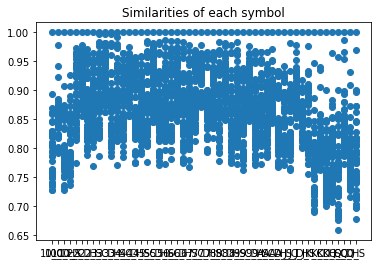

In [263]:
points = []

i = 1
for line in matrix:
    for point in line:
        points.append((i, point))
    i += 1

#plt.figure(figsize=(26,20))
plt.scatter(*zip(*points))
plt.xticks(list(range(1,53)), labels)
plt.title('Similarities of each symbol')
plt.savefig('graphs/similarity.png', dpi=500)
plt.show()




In [264]:
steps = [[] for _ in range(52)]

for j in range(len(matrix)):
    for i in range(len(line) - 1):
        steps[j].append(round(matrix[j][i+1] - matrix[j][i], 4))

for i in range(52):
    print(labels[i], steps[i])

10_C [0.0003, 0.0065, 0.0018, 0.0012, 0.002, 0.0029, 0.0069, 0.0009, 0.0021, 0.0014, 0.0001, 0.0002, 0.0024, 0.0013, 0.001, 0.0014, 0.0029, 0.0, 0.0001, 0.0023, 0.013, 0.0084, 0.0007, 0.0069, 0.0011, 0.0077, 0.0015, 0.0009, 0.0047, 0.0012, 0.0079, 0.0017, 0.0006, 0.0011, 0.0005, 0.0002, 0.001, 0.0005, 0.0016, 0.0003, 0.0017, 0.0001, 0.0009, 0.0015, 0.0139, 0.0034, 0.0112, 0.0035, 0.0068, 0.0251, 0.1057]
10_D [0.0065, 0.0038, 0.0169, 0.0002, 0.0011, 0.0016, 0.0038, 0.0101, 0.0008, 0.0, 0.0006, 0.0004, 0.003, 0.0008, 0.0, 0.0007, 0.0004, 0.0003, 0.0004, 0.0003, 0.0002, 0.0005, 0.0024, 0.0002, 0.0009, 0.0019, 0.001, 0.002, 0.0012, 0.0006, 0.0016, 0.0023, 0.0014, 0.0002, 0.0007, 0.0038, 0.0, 0.0029, 0.0005, 0.001, 0.0027, 0.002, 0.0004, 0.0037, 0.0042, 0.0016, 0.0024, 0.0383, 0.0179, 0.0369, 0.0218]
10_H [0.0038, 0.0033, 0.0143, 0.0003, 0.0042, 0.0063, 0.0049, 0.0015, 0.0, 0.0015, 0.0006, 0.001, 0.0001, 0.0009, 0.0006, 0.0001, 0.0009, 0.0017, 0.0004, 0.0027, 0.0046, 0.0021, 0.0014, 0.0022,

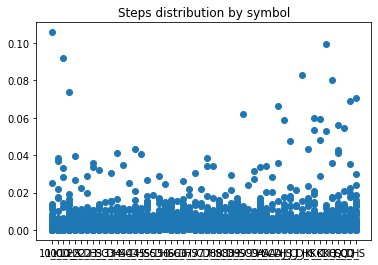

In [265]:
points = []

i = 1
for line in steps:
    for point in line:
        points.append((i, point))
    i += 1

#plt.figure(figsize=(26,20))
plt.scatter(*zip(*points))
plt.xticks(list(range(1,53)), labels)
plt.title('Steps distribution by symbol')
plt.savefig('graphs/steps.png', dpi=500)
plt.show()

In [266]:
data = []

for i in range(52):
    line = []
    line.append(matrix[i][0])
    line.append(matrix[i][50])
    line.append(matrix[i][50] - matrix[i][0])
    line.append(min(steps[i]))
    line.append(sum(steps[i]) / len(steps[i]))
    line.append(np.std(steps[i]))
    data.append(line)

df = pd.DataFrame(data, labels, ['Min', 'Max', 'Range', 'Min Step', 'Aver Step', 'Std Dev Step'])

df = df.sort_values(by=['Min'])
display(df)
df = df.sort_values(by=['Max'], ascending=False)
display(df)
df = df.sort_values(by=['Range'], ascending=False)
display(df)
df = df.sort_values(by=['Min Step'], ascending=False)
display(df)
df = df.sort_values(by=['Aver Step'], ascending=False)
display(df)
df = df.sort_values(by=['Std Dev Step'])
display(df)

,Min,Max,Range,Min Step,Aver Step,Std Dev Step
Q_C,0.6586,0.9570,0.2984,0.0000,0.006694,0.011166
Q_S,0.6774,0.9702,0.2928,0.0000,0.006325,0.011002
K_C,0.6889,0.9467,0.2578,0.0001,0.006100,0.011245
K_H,0.6994,0.9008,0.2014,0.0000,0.005894,0.015152
K_S,0.7078,0.9640,0.2562,0.0001,0.005729,0.012041
Q_H,0.7155,0.9309,0.2154,0.0000,0.005578,0.011097
10_C,0.7270,0.8943,0.1673,0.0000,0.005353,0.014898
10_H,0.7285,0.9078,0.1793,0.0000,0.005324,0.013740
10_S,0.7361,0.9264,0.1903,0.0000,0.005175,0.010675
J_S,0.7555,0.9767,0.2212,0.0000,0.004794,0.007480


,Min,Max,Range,Min Step,Aver Step,Std Dev Step
3_C,0.7862,0.9970,0.2108,0.0001,0.004192,0.005301
3_D,0.8616,0.9966,0.1350,0.0000,0.002714,0.003133
3_H,0.7860,0.9965,0.2105,0.0000,0.004196,0.005409
3_S,0.7717,0.9927,0.2210,0.0001,0.004476,0.006479
5_S,0.7725,0.9873,0.2148,0.0003,0.004461,0.004688
Q_D,0.7733,0.9872,0.2139,0.0001,0.004445,0.008318
6_C,0.7806,0.9857,0.2051,0.0000,0.004302,0.004578
5_C,0.7763,0.9848,0.2085,0.0000,0.004386,0.005328
6_D,0.8467,0.9846,0.1379,0.0000,0.003006,0.002835
8_C,0.7780,0.9839,0.2059,0.0000,0.004353,0.004439


,Min,Max,Range,Min Step,Aver Step,Std Dev Step
Q_C,0.6586,0.9570,0.2984,0.0000,0.006694,0.011166
Q_S,0.6774,0.9702,0.2928,0.0000,0.006325,0.011002
K_C,0.6889,0.9467,0.2578,0.0001,0.006100,0.011245
K_S,0.7078,0.9640,0.2562,0.0001,0.005729,0.012041
J_S,0.7555,0.9767,0.2212,0.0000,0.004794,0.007480
3_S,0.7717,0.9927,0.2210,0.0001,0.004476,0.006479
J_C,0.7622,0.9816,0.2194,0.0000,0.004663,0.007835
Q_H,0.7155,0.9309,0.2154,0.0000,0.005578,0.011097
5_S,0.7725,0.9873,0.2148,0.0003,0.004461,0.004688
Q_D,0.7733,0.9872,0.2139,0.0001,0.004445,0.008318


,Min,Max,Range,Min Step,Aver Step,Std Dev Step
6_S,0.7680,0.9783,0.2103,0.0004,0.004549,0.004435
5_S,0.7725,0.9873,0.2148,0.0003,0.004461,0.004688
8_D,0.8491,0.9813,0.1322,0.0001,0.002959,0.003511
A_S,0.7708,0.9414,0.1706,0.0001,0.004494,0.008500
4_S,0.7907,0.9591,0.1684,0.0001,0.004104,0.005932
4_H,0.7742,0.9569,0.1827,0.0001,0.004427,0.006884
2_H,0.7879,0.9709,0.1830,0.0001,0.004159,0.005051
A_H,0.7675,0.9335,0.1660,0.0001,0.004559,0.010233
9_S,0.7729,0.9661,0.1932,0.0001,0.004453,0.006070
7_C,0.8127,0.9693,0.1566,0.0001,0.003673,0.004921


,Min,Max,Range,Min Step,Aver Step,Std Dev Step
Q_C,0.6586,0.9570,0.2984,0.0000,0.006694,0.011166
Q_S,0.6774,0.9702,0.2928,0.0000,0.006325,0.011002
K_C,0.6889,0.9467,0.2578,0.0001,0.006100,0.011245
K_H,0.6994,0.9008,0.2014,0.0000,0.005894,0.015152
K_S,0.7078,0.9640,0.2562,0.0001,0.005729,0.012041
Q_H,0.7155,0.9309,0.2154,0.0000,0.005578,0.011097
10_C,0.7270,0.8943,0.1673,0.0000,0.005353,0.014898
10_H,0.7285,0.9078,0.1793,0.0000,0.005324,0.013740
10_S,0.7361,0.9264,0.1903,0.0000,0.005175,0.010675
J_S,0.7555,0.9767,0.2212,0.0000,0.004794,0.007480


,Min,Max,Range,Min Step,Aver Step,Std Dev Step
6_D,0.8467,0.9846,0.1379,0.0000,0.003006,0.002835
3_D,0.8616,0.9966,0.1350,0.0000,0.002714,0.003133
5_D,0.8451,0.9814,0.1363,0.0000,0.003037,0.003143
8_D,0.8491,0.9813,0.1322,0.0001,0.002959,0.003511
2_D,0.8549,0.9777,0.1228,0.0000,0.002845,0.003698
9_D,0.8465,0.9757,0.1292,0.0000,0.003010,0.003813
7_D,0.8715,0.9781,0.1066,0.0000,0.002520,0.004005
4_D,0.8558,0.9751,0.1193,0.0000,0.002827,0.004032
8_S,0.7730,0.9831,0.2101,0.0001,0.004451,0.004289
J_D,0.8388,0.9787,0.1399,0.0000,0.003161,0.004304
